# 1. IMPORTING AND PARSING THE DATA

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import seaborn as sns
from ipywidgets import interact
import statsmodels.formula.api as smf

%matplotlib inline

# CO2 UoM - [ppm]
# TEMP UoM - [Celsius]
# RH UoM - [%]
# PAR UoM - [mmol/m**2]

In [2]:
raw_gh = pd.read_csv('../GH 2016 RAW.csv')
raw_gh.shape

(366, 38)

In [3]:
raw_gh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 38 columns):
WEEK             366 non-null int64
DATE             366 non-null object
DAYCOUNT         366 non-null int64
WEEKDAY          366 non-null object
CO2              366 non-null float64
TEMP             366 non-null float64
RH               366 non-null float64
PAR              366 non-null float64
WEEKDAY_NUM      366 non-null int64
INDOOR DLI       366 non-null int64
FNGARUG042NYC    188 non-null float64
FNGASIA042NYC    82 non-null float64
FNGBASL012NYC    277 non-null float64
FNGBASLLOSNYC    276 non-null float64
FNGBTHD045NYC    293 non-null float64
FNGBTHDHEDNYC    0 non-null float64
FNGCRSP045NYC    64 non-null float64
FNGCRSPHEDNYC    1 non-null float64
FNGENDS042NYC    143 non-null float64
FNGGMED045NYC    198 non-null float64
FNGGMEDHEDCHI    0 non-null float64
FNGGMEDHEDNYC    1 non-null float64
FNGICEB045NYC    122 non-null float64
FNGICEBHEDNYC    4 non-null float64
FNGKA

In [4]:
raw_gh.describe()

,WEEK,DAYCOUNT,CO2,TEMP,RH,PAR,WEEKDAY_NUM,INDOOR DLI,FNGARUG042NYC,FNGASIA042NYC,...,FNGTROP045NYC,FNGOAKRHEDNYC,FNGTROPHEDNYC,FNGBTHDBBYNYC,FNGASIALOSNYC,FNGBASLWHLNYC,FNGUGLY012NYC,FNGENDSLOSNYC,FNGROMN045NYC,FNGROMNLOSNYC
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,188.000000,82.000000,...,56.000000,0.0,0.0,0.0,0.0,4.0,0.0,0.0,76.000000,0.0
mean,26.213115,183.500000,552.347541,20.995628,66.615027,9749.119399,4.008197,14973.773224,142.487926,61.117195,...,2.641429,NaN,NaN,NaN,NaN,0.0,NaN,NaN,64.227237,NaN
std,15.117565,105.799338,118.662576,2.750698,9.036321,3888.456513,2.000668,6124.992614,147.791945,18.389872,...,0.559690,NaN,NaN,NaN,NaN,0.0,NaN,NaN,32.805894,NaN
min,0.000000,1.000000,456.300000,16.500000,41.000000,1724.400000,1.000000,1768.000000,17.500000,26.760000,...,1.670000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,NaN
25%,13.000000,92.250000,486.500000,18.700000,59.600000,6810.525000,2.000000,10671.750000,75.465000,51.222500,...,2.250000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,39.047500,NaN
50%,26.000000,183.500000,515.600000,20.750000,65.800000,9285.850000,4.000000,14492.000000,99.000000,56.270000,...,2.515000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,52.920000,NaN
75%,39.000000,274.750000,545.775000,22.600000,72.700000,11973.800000,6.000000,18208.000000,144.990000,69.537500,...,2.962500,NaN,NaN,NaN,NaN,0.0,NaN,NaN,84.972500,NaN
max,52.000000,366.000000,1130.900000,29.700000,92.900000,20880.700000,7.000000,30856.000000,1650.000000,144.380000,...,4.030000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,159.780000,NaN


In [5]:
# ANOTHER METHOD //IF COUNT = 0 drop column not row // 

In [6]:
raw_gh.corr()

,WEEK,DAYCOUNT,CO2,TEMP,RH,PAR,WEEKDAY_NUM,INDOOR DLI,FNGARUG042NYC,FNGASIA042NYC,...,FNGTROP045NYC,FNGOAKRHEDNYC,FNGTROPHEDNYC,FNGBTHDBBYNYC,FNGASIALOSNYC,FNGBASLWHLNYC,FNGUGLY012NYC,FNGENDSLOSNYC,FNGROMN045NYC,FNGROMNLOSNYC
WEEK,1.000000,0.999821,-0.445155,0.245106,0.202756,-0.221182,-0.021255,-0.216923,-0.221677,0.147033,...,-0.255426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090738,NaN
DAYCOUNT,0.999821,1.000000,-0.445317,0.245222,0.202737,-0.221752,-0.002349,-0.217222,-0.220030,0.156073,...,-0.251862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.089526,NaN
CO2,-0.445155,-0.445317,1.000000,-0.159885,-0.267255,-0.213791,-0.003302,-0.155881,0.176751,-0.021742,...,-0.136858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.347943,NaN
TEMP,0.245106,0.245222,-0.159885,1.000000,0.285062,0.278695,0.003242,0.166295,-0.315368,-0.101555,...,0.009031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.356762,NaN
RH,0.202756,0.202737,-0.267255,0.285062,1.000000,-0.184686,-0.003386,-0.174395,0.117378,0.160324,...,-0.039871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155066,NaN
PAR,-0.221182,-0.221752,-0.213791,0.278695,-0.184686,1.000000,-0.027516,0.827176,0.016792,-0.103975,...,0.024781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.091984,NaN
WEEKDAY_NUM,-0.021255,-0.002349,-0.003302,0.003242,-0.003386,-0.027516,1.000000,-0.013243,0.127371,0.341065,...,0.095143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.045734,NaN
INDOOR DLI,-0.216923,-0.217222,-0.155881,0.166295,-0.174395,0.827176,-0.013243,1.000000,0.137019,-0.096884,...,0.056308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.089782,NaN
FNGARUG042NYC,-0.221677,-0.220030,0.176751,-0.315368,0.117378,0.016792,0.127371,0.137019,1.000000,0.689914,...,0.139111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.176888,NaN
FNGASIA042NYC,0.147033,0.156073,-0.021742,-0.101555,0.160324,-0.103975,0.341065,-0.096884,0.689914,1.000000,...,0.204093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.341395,NaN


In [7]:
CLIMATE = raw_gh[['DATE','CO2','TEMP','RH','PAR','INDOOR DLI']]
CLIMATE.head()

,DATE,CO2,TEMP,RH,PAR,INDOOR DLI
0,1/1/2016,479.5,18.4,58.0,6328.8,11858
1,1/2/2016,484.4,18.7,60.3,7496.9,12388
2,1/3/2016,490.6,18.7,57.1,8031.4,14454
3,1/4/2016,492.5,18.3,66.2,8308.8,12963
4,1/5/2016,536.5,17.4,58.4,8202.6,14585


In [8]:
GH = raw_gh.fillna(0)
GH = GH.dropna(axis =1)

In [9]:
GH.head()

,WEEK,DATE,DAYCOUNT,WEEKDAY,CO2,TEMP,RH,PAR,WEEKDAY_NUM,INDOOR DLI,...,FNGTROP045NYC,FNGOAKRHEDNYC,FNGTROPHEDNYC,FNGBTHDBBYNYC,FNGASIALOSNYC,FNGBASLWHLNYC,FNGUGLY012NYC,FNGENDSLOSNYC,FNGROMN045NYC,FNGROMNLOSNYC
0,0,1/1/2016,1,Friday,479.5,18.4,58.0,6328.8,5,11858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1/2/2016,2,Saturday,484.4,18.7,60.3,7496.9,6,12388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1/3/2016,3,Sunday,490.6,18.7,57.1,8031.4,7,14454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1/4/2016,4,Monday,492.5,18.3,66.2,8308.8,1,12963,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1/5/2016,5,Tuesday,536.5,17.4,58.4,8202.6,2,14585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
GH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 38 columns):
WEEK             366 non-null int64
DATE             366 non-null object
DAYCOUNT         366 non-null int64
WEEKDAY          366 non-null object
CO2              366 non-null float64
TEMP             366 non-null float64
RH               366 non-null float64
PAR              366 non-null float64
WEEKDAY_NUM      366 non-null int64
INDOOR DLI       366 non-null int64
FNGARUG042NYC    366 non-null float64
FNGASIA042NYC    366 non-null float64
FNGBASL012NYC    366 non-null float64
FNGBASLLOSNYC    366 non-null float64
FNGBTHD045NYC    366 non-null float64
FNGBTHDHEDNYC    366 non-null float64
FNGCRSP045NYC    366 non-null float64
FNGCRSPHEDNYC    366 non-null float64
FNGENDS042NYC    366 non-null float64
FNGGMED045NYC    366 non-null float64
FNGGMEDHEDCHI    366 non-null float64
FNGGMEDHEDNYC    366 non-null float64
FNGICEB045NYC    366 non-null float64
FNGICEBHEDNYC    366 non-null f

Axes(0.125,0.125;0.62x0.755)


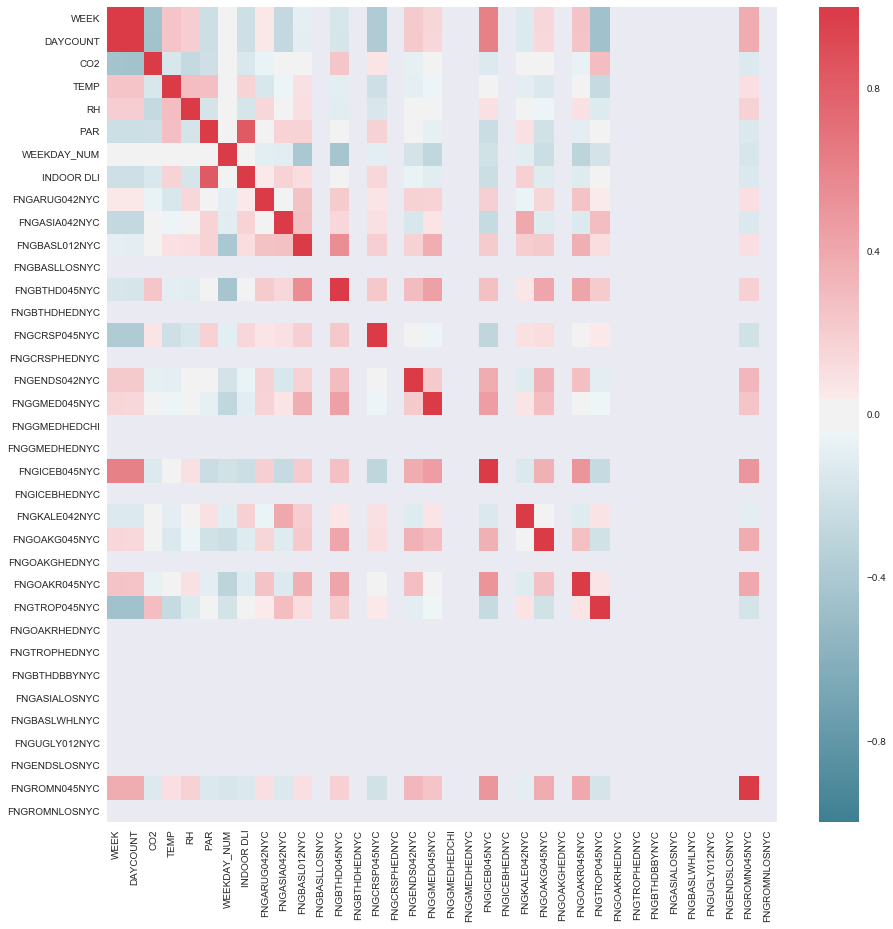

In [11]:
sns.set_style ("darkgrid")
cmap = sns.diverging_palette(220,10, as_cmap =True)

plt.figure(figsize = (15,15))

CRL = GH.corr()
print sns.heatmap(CRL,cmap=cmap)

Axes(0.125,0.125;0.62x0.755)


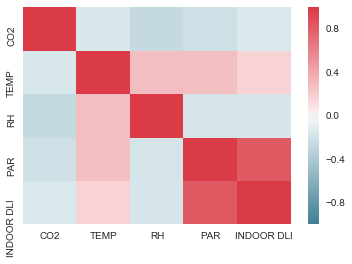

In [12]:
CRL = CLIMATE.corr()
print sns.heatmap(CRL, cmap=cmap)

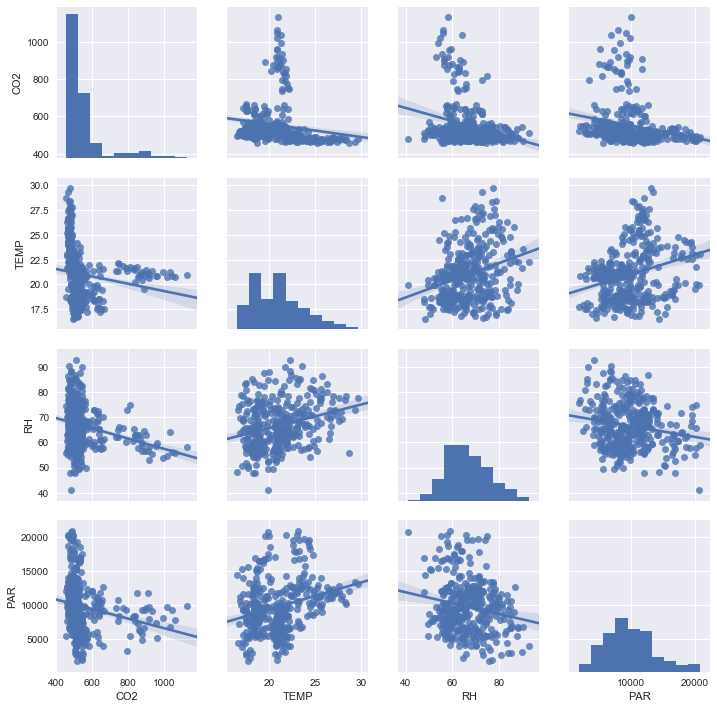

In [13]:
sns.pairplot(CLIMATE, vars=['CO2','TEMP','RH','PAR'], kind='reg')

In [14]:
type(GH)

pandas.core.frame.DataFrame

In [15]:
raw_gh = raw_gh.sort(['DAYCOUNT','DATE','CO2','TEMP','RH','PAR','FNGBTHD045NYC'], ascending=[0,1,0,0,0,0,0])

raw_data = raw_gh[['DATE','DAYCOUNT','CO2','TEMP','RH','PAR','FNGBTHD045NYC']]
raw_data.head()


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,DATE,DAYCOUNT,CO2,TEMP,RH,PAR,FNGBTHD045NYC
365,12/31/2016,366,515.7,21.9,59.3,6431.5,NaN
364,12/30/2016,365,527.8,21.9,60.0,5384.1,1.73
363,12/29/2016,364,584.1,22.0,68.0,4049.8,1.84
362,12/28/2016,363,532.4,21.8,61.0,5259.7,1.66
361,12/27/2016,362,507.5,22.4,74.1,5256.9,1.63


In [16]:
f=0
d = {}
z=42
j=366
while (j>42):
    d[j] = raw_data.loc[[(f+z)]]
    j-= 1
    f+= 1
    
print d[366]
print d[365]
print d[43]

         DATE  DAYCOUNT     CO2  TEMP    RH     PAR  FNGBTHD045NYC
42  2/12/2016        43  1044.3  20.9  56.0  9216.6           2.36
         DATE  DAYCOUNT     CO2  TEMP    RH     PAR  FNGBTHD045NYC
43  2/13/2016        44  1018.7  20.8  54.7  9760.1            3.2
           DATE  DAYCOUNT    CO2  TEMP    RH     PAR  FNGBTHD045NYC
365  12/31/2016       366  515.7  21.9  59.3  6431.5            NaN


In [17]:
data = raw_data.drop(['DATE','DAYCOUNT'],axis = 1)
data = data.fillna(0)
data.head()

,CO2,TEMP,RH,PAR,FNGBTHD045NYC
365,515.7,21.9,59.3,6431.5,0.00
364,527.8,21.9,60.0,5384.1,1.73
363,584.1,22.0,68.0,4049.8,1.84
362,532.4,21.8,61.0,5259.7,1.66
361,507.5,22.4,74.1,5256.9,1.63


In [18]:
#@interact (hue=['CO2','TEMP','INDOOR DLI', 'RH', 'PAR'])

#def plot (hue):
 #   _ = sns.pairplot(GH,hue=hue)
    

In [19]:
x = data['TEMP']
y = data['FNGBTHD045NYC']
log_y = np.log10(y+1)

lm = smf.ols(formula='y ~ TEMP', data=data).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.783
Date:                Wed, 24 May 2017   Prob (F-statistic):             0.0526
Time:                        18:52:53   Log-Likelihood:                -615.52
No. Observations:                 366   AIC:                             1235.
Df Residuals:                     364   BIC:                             1243.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0747      0.525      5.851      0.000         2.041     4.108
TEMP          -0.0483      0.025     -1.945      0.053        -0.097     0.001
==============================================================================
Omnibus:                        1.395   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.196
Skew:                           0.029   Prob(JB):                        0.550
Kurtosis:                       3.274   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
y = GH['FNGBTHD045NYC']
log_y = np.log10(y+1)

lm = smf.ols(formula='log_y ~ TEMP', data=GH).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.081
Date:                Wed, 24 May 2017   Prob (F-statistic):              0.299
Time:                        18:52:54   Log-Likelihood:                 11.667
No. Observations:                 366   AIC:                            -19.33
Df Residuals:                     364   BIC:                            -11.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5306      0.095      5.603      0.000         0.344     0.717
TEMP          -0.0046      0.004     -1.040      0.299        -0.013     0.004
==============================================================================
Omnibus:                       44.735   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.897
Skew:                          -0.976   Prob(JB):                     1.62e-13
Kurtosis:                       2.767   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
y = GH['FNGBTHD045NYC']
log_y = np.log10(y+1)

lm = smf.ols(formula='log_y ~ TEMP + RH + PAR', data=GH).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7035
Date:                Wed, 24 May 2017   Prob (F-statistic):              0.550
Time:                        18:52:54   Log-Likelihood:                 12.188
No. Observations:                 366   AIC:                            -16.38
Df Residuals:                     362   BIC:                           -0.7657
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5632      0.119      4.746      0.000         0.330     0.797
TEMP          -0.0049      0.005     -0.975      0.330        -0.015     0.005
RH            -0.0008      0.001     -0.518      0.605        -0.004     0.002
PAR         2.372e-06   3.44e-06      0.689      0.491      -4.4e-06  9.14e-06
==============================================================================
Omnibus:                       44.163   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.894
Skew:                          -0.967   Prob(JB):                     2.68e-13
Kurtosis:                       2.765   Cond. No.                     1.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
y = GH['FNGBTHD045NYC']
log_y = np.log10(y+1)

lm = smf.ols(formula='y ~ CO2 + TEMP + RH + PAR', data=GH).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     6.167
Date:                Wed, 24 May 2017   Prob (F-statistic):           8.26e-05
Time:                        18:52:54   Log-Likelihood:                -605.32
No. Observations:                 366   AIC:                             1221.
Df Residuals:                     361   BIC:                             1240.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.5634      0.846      1.848      0.065        -0.100     3.227
CO2            0.0025      0.001      4.111      0.000         0.001     0.004
TEMP          -0.0291      0.027     -1.076      0.283        -0.082     0.024
RH            -0.0051      0.008     -0.603      0.547        -0.022     0.011
PAR         7.016e-06   1.93e-05      0.363      0.717      -3.1e-05   4.5e-05
==============================================================================
Omnibus:                        3.708   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.621
Skew:                          -0.164   Prob(JB):                        0.164
Kurtosis:                       3.361   Cond. No.                     1.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
y = GH['FNGBTHD045NYC']
log_y = np.log10(y+1)

lm = smf.ols(formula='log_y ~ CO2 + TEMP + RH + PAR', data=GH).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.141
Date:                Wed, 24 May 2017   Prob (F-statistic):             0.0147
Time:                        18:52:54   Log-Likelihood:                 17.385
No. Observations:                 366   AIC:                            -24.77
Df Residuals:                     361   BIC:                            -5.257
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2393      0.154      1.551      0.122        -0.064     0.543
CO2            0.0004      0.000      3.225      0.001         0.000     0.001
TEMP          -0.0050      0.005     -1.013      0.312        -0.015     0.005
RH             0.0007      0.002      0.477      0.634        -0.002     0.004
PAR          5.37e-06   3.52e-06      1.524      0.128     -1.56e-06  1.23e-05
==============================================================================
Omnibus:                       46.463   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.455
Skew:                          -1.010   Prob(JB):                     2.74e-14
Kurtosis:                       2.892   Cond. No.                     1.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

REALLY LOW R2 scores. Maybe GRID SERACH

In [24]:
lm.pvalues

Intercept    0.121767
CO2          0.001376
TEMP         0.311892
RH           0.633755
PAR          0.128430
dtype: float64

In [25]:
lm.conf_int()

,0,1
Intercept,-0.064116,0.542790
CO2,0.000139,0.000575
TEMP,-0.014680,0.004700
RH,-0.002291,0.003758
PAR,-0.000002,0.000012


In [26]:
lm.params

Intercept    0.239337
CO2          0.000357
TEMP        -0.004990
RH           0.000733
PAR          0.000005
dtype: float64

In [27]:
data = raw_data.drop(['DATE','DAYCOUNT'],axis = 1)
data = data.fillna(0)
data.head()

,CO2,TEMP,RH,PAR,FNGBTHD045NYC
365,515.7,21.9,59.3,6431.5,0.00
364,527.8,21.9,60.0,5384.1,1.73
363,584.1,22.0,68.0,4049.8,1.84
362,532.4,21.8,61.0,5259.7,1.66
361,507.5,22.4,74.1,5256.9,1.63


In [28]:
from sklearn import linear_model, metrics, cross_validation, grid_search


kf = cross_validation.KFold(len(GH),n_folds = 5, shuffle = True)
y = data.FNGBTHD045NYC

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [29]:
mse_values = []
scores = []
n= 0
print "CROSS VALIDATION"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(data.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(data.iloc[test_index])))
    scores.append(lm.score(data, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "SUMMARY"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

CROSS VALIDATION
Model 1
MSE: 1.07807925291e-29
R2: 1.0
Model 2
MSE: 1.0366936852e-29
R2: 1.0
Model 3
MSE: 3.13067251912e-30
R2: 1.0
Model 4
MSE: 8.68204681284e-31
R2: 1.0
Model 5
MSE: 3.30532849043e-30
R2: 1.0
SUMMARY
Mean of MSE for all folds: 5.69038701438e-30
Mean of R2 for all folds: 1.0


In [30]:
lm = linear_model.LinearRegression().fit(data, y)

print 'OLS MSE: ', metrics.mean_squared_error(y, lm.predict(data))
print 'OLS R2:', lm.score(data, y)

lm = linear_model.Lasso().fit(data, y)

print 'Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(data))
print 'Lasso R2:', lm.score(data, y)

lm = linear_model.Ridge().fit(data, y)

print 'Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(data))
print 'Ridge R2:', lm.score(data, y)

OLS MSE:  4.66799898742e-30
OLS R2: 1.0
Lasso MSE:  0.617981651079
Lasso R2: 0.638420292745
Ridge MSE:  4.65038932361e-06
Ridge R2: 0.999997279067


In [31]:
alphas = np.logspace(-10, 10, 10)
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(data, y)
    print lm.coef_
    print metrics.mean_squared_error(y, lm.predict(data))

Alpha: 1e-10
[  4.24791359e-16  -4.95728075e-15  -8.66746084e-16   1.18393462e-18
   1.00000000e+00]
4.64019051806e-26
Alpha: 1.6681005372e-08
[  7.10799814e-14  -8.27961473e-13  -1.44714124e-13   1.99862949e-16
   1.00000000e+00]
1.29837223325e-21
Alpha: 2.78255940221e-06
[  1.18571343e-11  -1.38114227e-10  -2.41396634e-11   3.33416671e-14
   9.99999995e-01]
3.61294681528e-17
Alpha: 0.000464158883361
[  1.97788790e-09  -2.30388202e-08  -4.02673575e-09   5.56172222e-12
   9.99999207e-01]
1.00532254691e-12
Alpha: 0.0774263682681
[  3.29888209e-07  -3.84247079e-06  -6.71623617e-07   9.27598409e-10
   9.99867784e-01]
2.79663382862e-08
Alpha: 12.9154966501
[  5.38477113e-05  -6.23667302e-04  -1.09951543e-04   1.50578673e-07
   9.78418517e-01]
0.0007451224804
Alpha: 2154.43469003
[  1.96795879e-03  -1.18520934e-02  -4.77277007e-03   3.05730867e-06
   2.13992439e-01]
0.98911244742
Alpha: 359381.36638
[  2.48811607e-03  -2.41990579e-04  -6.03301002e-04   3.23067648e-06
   1.64288955e-03]
1.60

GRIDSEARCH!!!

In [32]:

alphas = np.logspace(-10, 10, 10)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')

gs.fit(data, y)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-pa

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.66810e-08,   2.78256e-06,   4.64159e-04,
         7.74264e-02,   1.29155e+01,   2.15443e+03,   3.59381e+05,
         5.99484e+07,   1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [33]:
print 'ALL ESTIMATORS'
print gs.grid_scores_ 


print 'BEST ESTIMATOR'
print -gs.best_score_ 

print gs.best_estimator_ 

ALL ESTIMATORS
[mean: -0.00000, std: 0.00000, params: {'alpha': 1e-10}, mean: -0.00000, std: 0.00000, params: {'alpha': 1.6681005372000592e-08}, mean: -0.00000, std: 0.00000, params: {'alpha': 2.782559402207126e-06}, mean: -0.00000, std: 0.00000, params: {'alpha': 0.00046415888336127822}, mean: -0.00000, std: 0.00000, params: {'alpha': 0.077426368268112777}, mean: -0.00631, std: 0.00691, params: {'alpha': 12.915496650148826}, mean: -2.87240, std: 2.68063, params: {'alpha': 2154.4346900318865}, mean: -1.68854, std: 0.59367, params: {'alpha': 359381.36638046405}, mean: -1.83889, std: 0.59433, params: {'alpha': 59948425.031894207}, mean: -1.81094, std: 0.61609, params: {'alpha': 10000000000.0}]
BEST ESTIMATOR
4.12552188623e-25
Ridge(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


# TIME SERIES


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2016-01-01 to 2016-12-31
Data columns (total 37 columns):
WEEK             366 non-null int64
DAYCOUNT         366 non-null int64
WEEKDAY          366 non-null object
CO2              366 non-null float64
TEMP             366 non-null float64
RH               366 non-null float64
PAR              366 non-null float64
WEEKDAY_NUM      366 non-null int64
INDOOR DLI       366 non-null int64
FNGARUG042NYC    366 non-null float64
FNGASIA042NYC    366 non-null float64
FNGBASL012NYC    366 non-null float64
FNGBASLLOSNYC    366 non-null float64
FNGBTHD045NYC    366 non-null float64
FNGBTHDHEDNYC    366 non-null float64
FNGCRSP045NYC    366 non-null float64
FNGCRSPHEDNYC    366 non-null float64
FNGENDS042NYC    366 non-null float64
FNGGMED045NYC    366 non-null float64
FNGGMEDHEDCHI    366 non-null float64
FNGGMEDHEDNYC    366 non-null float64
FNGICEB045NYC    366 non-null float64
FNGICEBHEDNYC    366 non-null float64
FNGKALE042N

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead


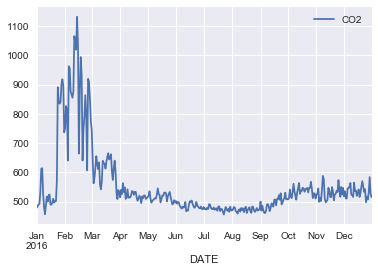

In [34]:
#use time series to find autocorrelation between the values and temp, co2, RH and PAR

GH['DATE'] = pd.to_datetime(GH['DATE'])
GH.set_index('DATE', inplace=True)
GH.head()
GH.info()

CO2 = GH[GH.WEEK < 54 ][['CO2']].resample ('d')
CO2.plot()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app


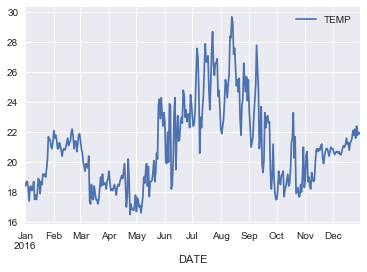

In [35]:
TEMP = GH[GH.WEEK < 54 ][['TEMP']].resample ('d')
TEMP.plot()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app


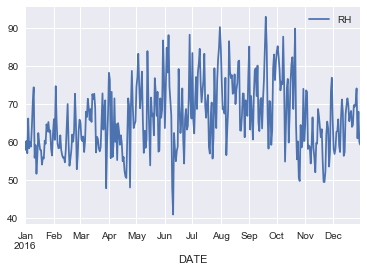

In [36]:
RH = GH[GH.WEEK < 54 ][['RH']].resample ('d')
RH.plot()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app


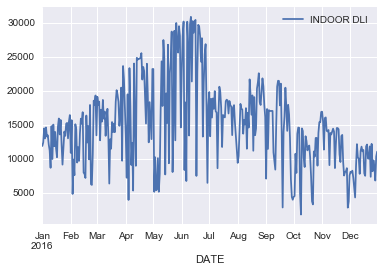

In [37]:
DLI = GH[GH.WEEK < 54 ][['INDOOR DLI']].resample ('d')
DLI.plot()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app


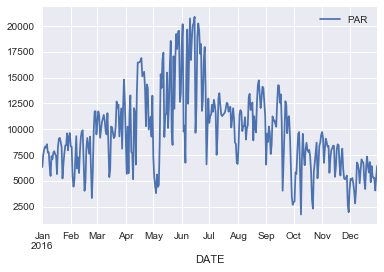

In [38]:
PAR = GH[GH.WEEK < 54 ][['PAR']].resample ('d')
PAR.plot()

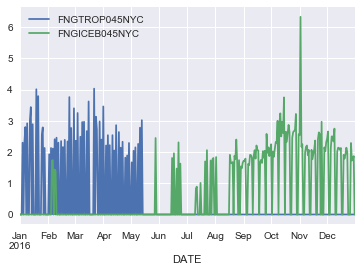

In [39]:
GH[GH.WEEK < 54 ][['FNGTROP045NYC','FNGICEB045NYC']].resample ('d').mean().fillna(0).plot()

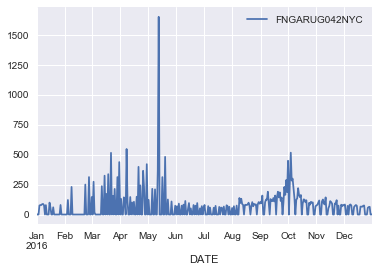

In [40]:
GH[GH.WEEK < 54 ][['FNGARUG042NYC']].resample ('d').mean().fillna(0).plot()

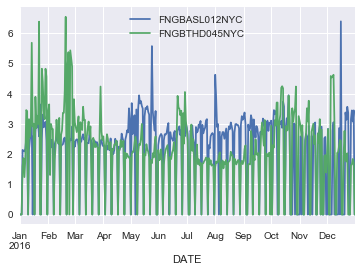

In [41]:
GH[GH.WEEK < 54 ][['FNGBASL012NYC','FNGBTHD045NYC']].resample ('d').mean().fillna(0).plot()

In [42]:
GH[GH.WEEK < 54 ][['FNGBASL012NYC']].resample ('d')

TS = GH[GH.WEEK < 54][['FNGBASL012NYC']].resample ('d').mean().fillna(0)
TS.head()

,FNGBASL012NYC
DATE,
2016-01-01,0.00
2016-01-02,0.00
2016-01-03,0.00
2016-01-04,2.14
2016-01-05,2.11


In [43]:
TS1 = GH[GH.WEEK < 54][['CO2','TEMP','RH','PAR','INDOOR DLI','FNGBASL012NYC']].resample ('d').mean().fillna(0)
TS1.head()

,CO2,TEMP,RH,PAR,INDOOR DLI,FNGBASL012NYC
DATE,,,,,,
2016-01-01,479.5,18.4,58.0,6328.8,11858,0.00
2016-01-02,484.4,18.7,60.3,7496.9,12388,0.00
2016-01-03,490.6,18.7,57.1,8031.4,14454,0.00
2016-01-04,492.5,18.3,66.2,8308.8,12963,2.14
2016-01-05,536.5,17.4,58.4,8202.6,14585,2.11


In [44]:
TS2 = GH[GH.WEEK < 54][['CO2','TEMP','RH','PAR','INDOOR DLI','FNGARUG042NYC']].resample ('d').mean().fillna(0)
TS2.head()

,CO2,TEMP,RH,PAR,INDOOR DLI,FNGARUG042NYC
DATE,,,,,,
2016-01-01,479.5,18.4,58.0,6328.8,11858,0.00
2016-01-02,484.4,18.7,60.3,7496.9,12388,0.00
2016-01-03,490.6,18.7,57.1,8031.4,14454,0.00
2016-01-04,492.5,18.3,66.2,8308.8,12963,75.25
2016-01-05,536.5,17.4,58.4,8202.6,14585,78.87


In [45]:
TS3 = GH[GH.WEEK < 54][['CO2','TEMP','RH','PAR','INDOOR DLI','FNGTROP045NYC']].resample ('d').mean().fillna(0)
TS3.head()

,CO2,TEMP,RH,PAR,INDOOR DLI,FNGTROP045NYC
DATE,,,,,,
2016-01-01,479.5,18.4,58.0,6328.8,11858,0.0
2016-01-02,484.4,18.7,60.3,7496.9,12388,0.0
2016-01-03,490.6,18.7,57.1,8031.4,14454,0.0
2016-01-04,492.5,18.3,66.2,8308.8,12963,2.3
2016-01-05,536.5,17.4,58.4,8202.6,14585,0.0


In [46]:
TS4 = GH[GH.WEEK < 54][['CO2','TEMP','RH','PAR','INDOOR DLI','FNGICEB045NYC']].resample ('d').mean().fillna(0)
TS4.head()

,CO2,TEMP,RH,PAR,INDOOR DLI,FNGICEB045NYC
DATE,,,,,,
2016-01-01,479.5,18.4,58.0,6328.8,11858,0.0
2016-01-02,484.4,18.7,60.3,7496.9,12388,0.0
2016-01-03,490.6,18.7,57.1,8031.4,14454,0.0
2016-01-04,492.5,18.3,66.2,8308.8,12963,0.0
2016-01-05,536.5,17.4,58.4,8202.6,14585,0.0


In [47]:
TS5 = GH[GH.WEEK < 54][['CO2','TEMP','RH','PAR','INDOOR DLI','FNGBTHD045NYC']].resample ('d').mean().fillna(0)
TS5.head()

,CO2,TEMP,RH,PAR,INDOOR DLI,FNGBTHD045NYC
DATE,,,,,,
2016-01-01,479.5,18.4,58.0,6328.8,11858,0.00
2016-01-02,484.4,18.7,60.3,7496.9,12388,0.00
2016-01-03,490.6,18.7,57.1,8031.4,14454,0.00
2016-01-04,492.5,18.3,66.2,8308.8,12963,1.60
2016-01-05,536.5,17.4,58.4,8202.6,14585,1.87


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).mean()


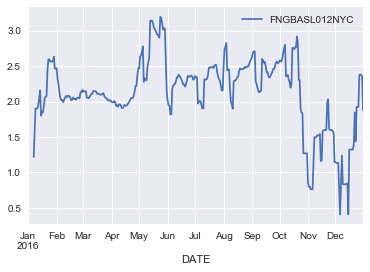

In [48]:
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

pd.rolling_mean(TS1[['FNGBASL012NYC']],7).plot()


In [49]:
print ('test:',TS1['FNGBASL012NYC'].autocorr(1))
print ('test:',TS1['FNGBASL012NYC'].autocorr(7))
print ('test:',TS1['FNGBASL012NYC'].autocorr(21))
print ('test:',TS1['FNGBASL012NYC'].autocorr(42))


('test:', 0.095159432257018881)
('test:', 0.6321787581439805)
('test:', 0.59994224933354434)
('test:', 0.58229468337299561)


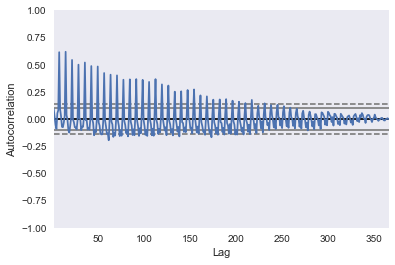

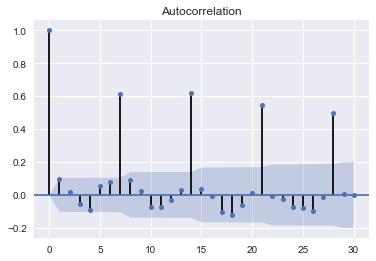

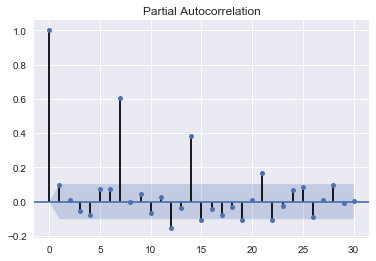

In [50]:
autocorrelation_plot(TS1['FNGBASL012NYC'])
plot_acf(TS1['FNGBASL012NYC'], lags =30)
plot_pacf(TS1['FNGBASL012NYC'], lags =30);

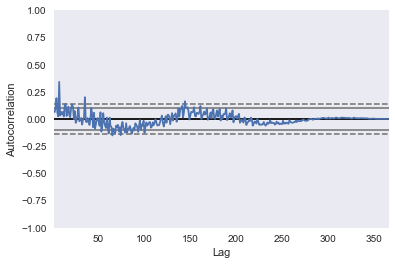

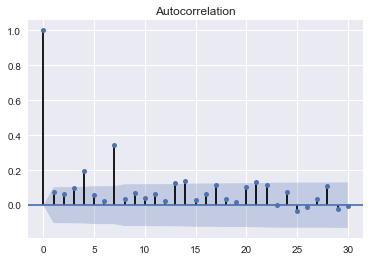

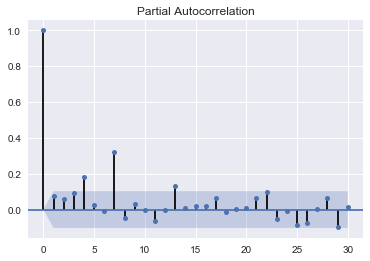

In [51]:
autocorrelation_plot(TS2['FNGARUG042NYC'])
plot_acf(TS2['FNGARUG042NYC'],lags=30)
plot_pacf(TS2['FNGARUG042NYC'],lags=30);

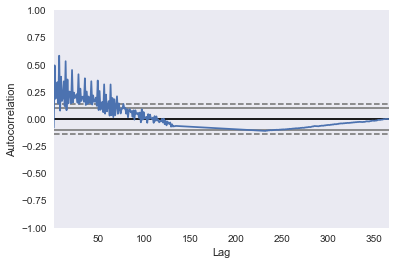

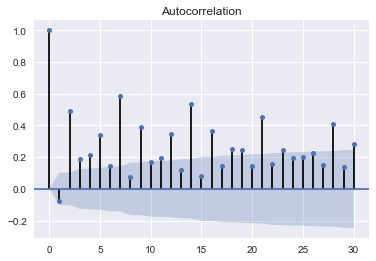

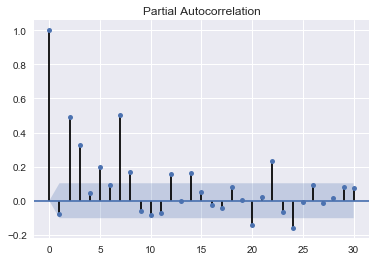

In [52]:
autocorrelation_plot(TS3['FNGTROP045NYC'])
plot_acf(TS3['FNGTROP045NYC'],lags=30)
plot_pacf(TS3['FNGTROP045NYC'],lags=30);

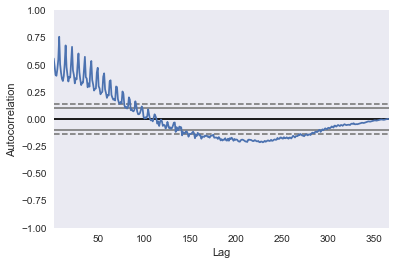

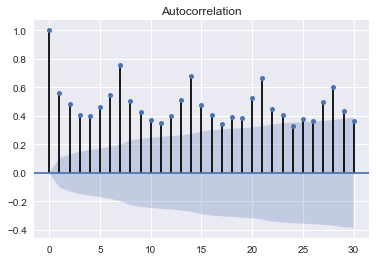

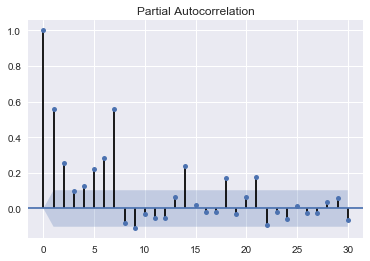

In [53]:
autocorrelation_plot(TS4['FNGICEB045NYC'])
plot_acf(TS4['FNGICEB045NYC'],lags=30)
plot_pacf(TS4['FNGICEB045NYC'],lags=30);

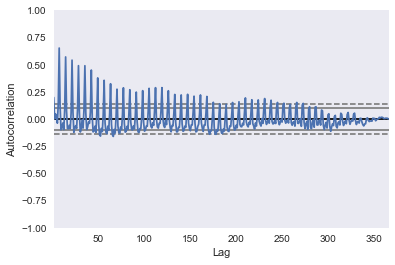

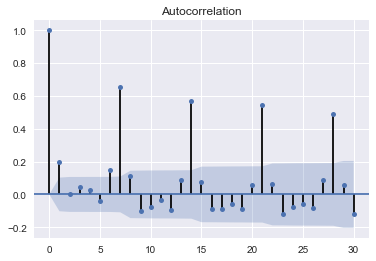

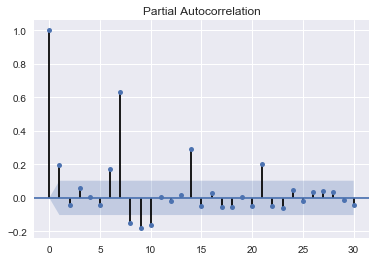

In [54]:
autocorrelation_plot(TS5['FNGBTHD045NYC'])
plot_acf(TS5['FNGBTHD045NYC'],lags=30)
plot_pacf(TS5['FNGBTHD045NYC'],lags=30);

In [55]:
TS1.sort(inplace = True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


In [56]:
n = len(TS1)

train = TS1.FNGBASL012NYC[:int(.75*n)]
test = TS1.FNGBASL012NYC[int(.75*n):]
temp1 = TS1.TEMP[:int(.75*n)]
co21 = TS1.CO2[:int(.75*n)]
par1 = TS1.PAR[:int(.75*n)]
rh1 = TS1.RH[:int(.75*n)]


In [57]:
print train.index.min()
print train.index.max()

2016-01-01 00:00:00
2016-09-30 00:00:00


In [58]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [59]:
model = sm.tsa.ARIMA(train, (2, 0, 0), exog = temp1).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          FNGBASL012NYC   No. Observations:                  274
Model:                     ARMA(2, 0)   Log Likelihood                -416.879
Method:                       css-mle   S.D. of innovations              1.108
Date:                Wed, 24 May 2017   AIC                            843.757
Time:                        18:53:07   BIC                            861.823
Sample:                    01-01-2016   HQIC                           851.008
                         - 09-30-2016                                         
=======================================================================================
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   1.7547      0.461      3.804      0.000         0.851     2.659
TEMP                    0.0244      0.021      1.137      0.256        -0.018     0.066
ar.L1.FNGBASL012NYC     0.0070      0.061      0.115      0.909        -0.112     0.126
ar.L2.FNGBASL012NYC    -0.0460      0.061     -0.753      0.452        -0.166     0.074
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0756           -4.6594j            4.6600           -0.2474
AR.2            0.0756           +4.6594j            4.6600            0.2474
-----------------------------------------------------------------------------
"""

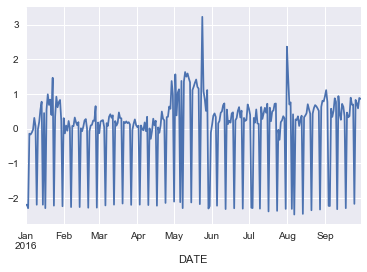

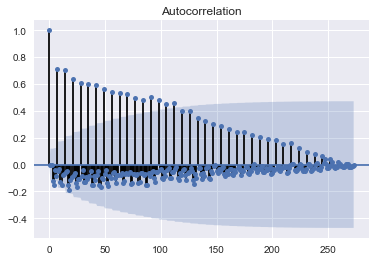

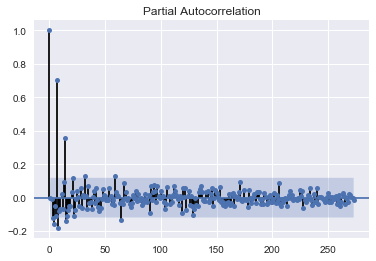

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\tsa\arima_model.py:1724: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


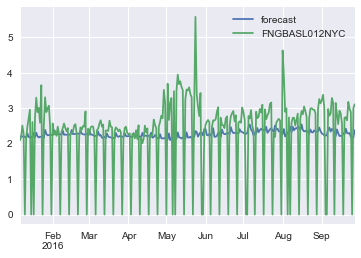

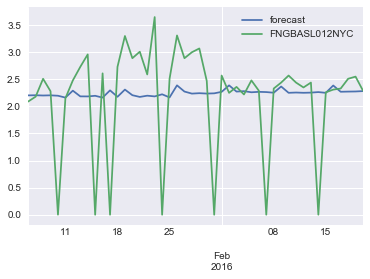

In [60]:
model.resid.plot()

plot_acf(model.resid)
plt.show()

plot_pacf(model.resid)
plt.show()

model.plot_predict(5,270)
model.plot_predict(5,50);

In [61]:
model = sm.tsa.ARIMA(train, (5, 0, 2), exog = temp1).fit()
model.summary()


C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          FNGBASL012NYC   No. Observations:                  274
Model:                     ARMA(5, 2)   Log Likelihood                -367.554
Method:                       css-mle   S.D. of innovations              0.915
Date:                Wed, 24 May 2017   AIC                            755.107
Time:                        18:53:11   BIC                            791.238
Sample:                    01-01-2016   HQIC                           769.609
                         - 09-30-2016                                         
=======================================================================================
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   1.9277      0.376      5.124      0.000         1.190     2.665
TEMP                    0.0165      0.018      0.940      0.348        -0.018     0.051
ar.L1.FNGBASL012NYC    -0.3011      0.066     -4.580      0.000        -0.430    -0.172
ar.L2.FNGBASL012NYC    -0.7559      0.061    -12.483      0.000        -0.875    -0.637
ar.L3.FNGBASL012NYC    -0.1516      0.077     -1.982      0.049        -0.302    -0.002
ar.L4.FNGBASL012NYC     0.0145      0.068      0.214      0.831        -0.119     0.148
ar.L5.FNGBASL012NYC    -0.3728      0.065     -5.743      0.000        -0.500    -0.246
ma.L1.FNGBASL012NYC     0.4088      0.060      6.776      0.000         0.291     0.527
ma.L2.FNGBASL012NYC     0.9817      0.058     16.789      0.000         0.867     1.096
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3267           -0.0000j            1.3267           -0.5000
AR.2           -0.2218           -0.9757j            1.0006           -0.2856
AR.3           -0.2218           +0.9757j            1.0006            0.2856
AR.4            0.9046           -1.0962j            1.4212           -0.1402
AR.5            0.9046           +1.0962j            1.4212            0.1402
MA.1           -0.2082           -0.9876j            1.0093           -0.2831
MA.2           -0.2082           +0.9876j            1.0093            0.2831
-----------------------------------------------------------------------------
"""

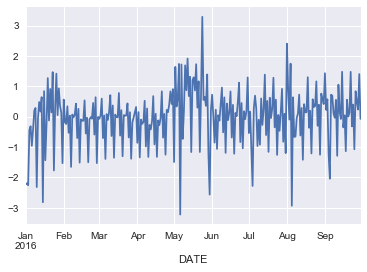

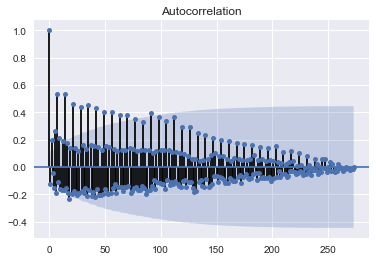

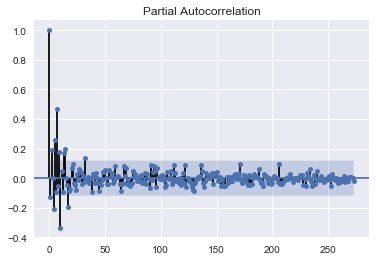

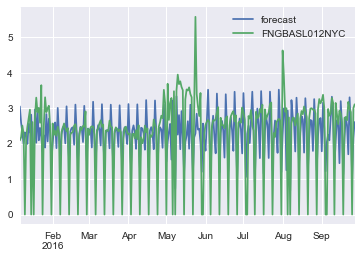

In [62]:
model.resid.plot()

plot_acf(model.resid)
plt.show()

plot_pacf(model.resid)
plt.show()

model.plot_predict(5,270);

In [63]:
model = sm.tsa.ARIMA(GH, (6, 1, 5), exog = temp1).fit()
model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
model.resid.plot()

plot_acf(model.resid)
plt.show()

plot_pacf(model.resid)
plt.show()

model.plot_predict(5,270)
model.plot_predict(5,50);

In [ ]:
model = sm.tsa.ARIMA(train, (1, 1, 2), exog = temp1).fit()
model.summary()

In [ ]:
model.resid.plot()

plot_acf(model.resid)
plt.show()

plot_pacf(model.resid)
plt.show()

model.plot_predict(5,270);

In [ ]:
model = sm.tsa.ARIMA(train, (5, 2, 2), exog = temp1).fit()
model.summary()

In [ ]:
model.resid.plot()

plot_acf(model.resid)
plt.show()

plot_pacf(model.resid)
plt.show()

model.plot_predict(5,270)
model.plot_predict(5,50);

In [ ]:
mod = sm.tsa.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12))

results = mod.fit()

print(results.summary().tables[1])